Source: http://xarray.pydata.org/en/stable/auto_gallery/plot_cartopy_facetgrid.html

In [1]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import xarray as xr

This is the map projection we want to plot *onto*

In [2]:
map_proj = ccrs.LambertConformal(central_longitude=-95, central_latitude=45)

Load the data

In [3]:
%%time 
ds = xr.tutorial.load_dataset('air_temperature')

CPU times: user 130 ms, sys: 0 ns, total: 130 ms
Wall time: 130 ms


In [4]:
%%time 
air = ds.air.isel(time=[0, 724]) - 273.15

CPU times: user 10 ms, sys: 0 ns, total: 10 ms
Wall time: 4.25 ms


Plot air temperature

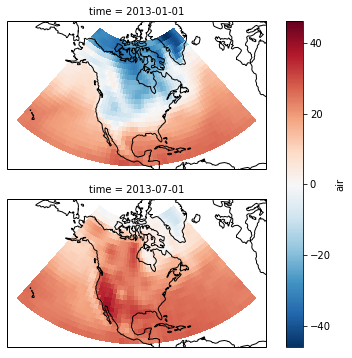

In [7]:
p = air.plot(transform=ccrs.PlateCarree(),            # the data's projection
             col='time', col_wrap=1,                  # multiplot settings
             aspect=ds.dims['lon'] / ds.dims['lat'],  # for a sensible figsize
             subplot_kws={'projection': map_proj})    # the plot's projection

# We have to set the map's options on all four axes
for ax in p.axes.flat:
    ax.coastlines()
    ax.set_extent([-160, -30, 5, 75])
    # Without this aspect attributes the maps will look chaotic and the
    # "extent" attribute above will be ignored
    ax.set_aspect('equal')
